In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np


Reading only the following columns => `wdir` | `Tper` | `sper` | `Tdir` | `sdir` | `Length` | `Width`

In [140]:
fields = [
    # 'whgt',
    # 'wper',
    'wdir',
    'Tper',
    'sper',
    'Tdir',
    'sdir',
    # 'Length',
    # 'Width',
    "SOG"
]

In [153]:
# reading selective columns for our model
df = pd.read_csv("./Draft Cleaned Merged.csv", skipinitialspace=True, usecols=fields)
df.head()

,Tdir,Tper,sdir,sper,wdir,SOG
0,198.0,6.024096,213.0,5.9,296.0,9.7
1,198.0,6.024096,213.0,5.9,296.0,9.7
2,198.0,6.024096,213.0,5.9,296.0,9.8
3,198.0,6.024096,213.0,5.9,296.0,9.8
4,198.0,6.024096,213.0,5.9,296.0,9.9


In [154]:
df = df[df["SOG"] > 0.0]

In [155]:
df.shape

(4402, 6)

In [156]:
Y = df[["SOG"]]
X = df.drop("SOG", axis=1)

In [157]:
# cross validation technique being applied => test-train split
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)

In [158]:
x_train.shape

(3301, 5)

In [159]:
# training multiple linear regression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [160]:
# testing our MLR
y_pred = reg.predict(x_test)

In [163]:
reg.score(x_train, y_train)

0.3466442024362335

In [164]:
reg.predict([[
    5.9,
    2.2,
    0.22,
    250,
    40
]])

c:\Users\aajin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[15569.89635058]])

In [184]:
reg.predict([[
    211.3,
    6.04,
    213,
    5.9,
    297
]])

c:\Users\aajin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.78134114]])

In [166]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test, y_pred)
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is  0.18704890487633485
mean_sqrd_error is== 207.51713935638182
root_mean_squared error of is== 14.405455194348487


In [174]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_model = PolynomialFeatures(degree=2)
poly_x_values = poly_model.fit_transform(X.values)

In [175]:
# cross validation technique being applied => test-train split
# poly_x_train, poly_x_test, y_train, y_test = train_test_split(poly_x_values, Y.values, test_size = 0.3, random_state = 4)

In [176]:
poly_x_values[0].shape

(21,)

In [177]:
y_test.shape

(1101, 1)

In [178]:
# we use linear regression as a base
regression_model = LinearRegression()
model = regression_model.fit(poly_x_values, Y.values)
# model.score(poly_x_test, y_test)

In [181]:
X.head()

,Tdir,Tper,sdir,sper,wdir
0,198.0,6.024096,213.0,5.9,296.0
1,198.0,6.024096,213.0,5.9,296.0
2,198.0,6.024096,213.0,5.9,296.0
3,198.0,6.024096,213.0,5.9,296.0
4,198.0,6.024096,213.0,5.9,296.0


In [183]:
Y.head()

,SOG
0,9.7
1,9.7
2,9.8
3,9.8
4,9.9


In [182]:
temp = np.array([
   211.3,
    6.04,
    213,
    5.9,
    297
]).reshape(1, -1)
predict_ = poly_model.fit_transform(temp)
predict_[0].shape
# predict_ = np.delete(predict_,(1),axis=1)

regression_model.predict(predict_)

array([[1.0036596e+08]])

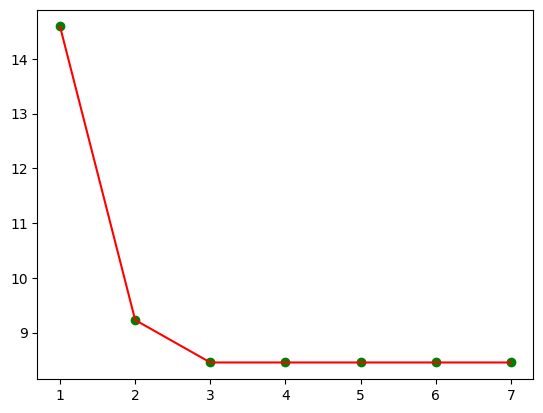

In [180]:
# check our accuracy for each degree, the lower the error the better!
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(X.values)
   # poly_model.fit(poly_x_values, Y.values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, Y.values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(Y.values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 